This notebook:

1. Plots UV melting data and validates with array measurement
2. Plots Figure 2 for the paper.

# Getting started

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%run nnn/ipynb_init.py
import explore_fig as ef

# UV melting

## WC68

__08/02/2022__

Titration of concentrations to figure out optimal condition for the script.

TargetConcentration -> {1, 2, 4, 6, 8, 10, 12}

In [2]:
# reading fitted parameters into a single DataFrame
conc = [1, 2, 4, 6, 8, 10, 12]
datadir = './data/uv_melt/UVmelting_WC68_1M/'
cols_p = ['dH', 'Tm', 'fmax', 'fmin', 'slopel', 'slopeu']
cols_se = [c+'_se' for c in cols_p]
cols = ['conc', 'curve_name'] + cols_p + cols_se
uv_melt_df = pd.DataFrame(columns=cols)

for i in range(1, 8):
    for curve_name in ['MeltingCurve', 'CoolingCurve', 'SecondaryMeltingCurve', 'SecondaryCoolingCurve']:
        df = pd.read_csv(os.path.join(datadir, 'WC68_conc%d_%s.csv') % (i, curve_name), header=None, index_col=0)
        row_dict = {**dict(conc=conc[i-1], curve_name=curve_name), **{c: df.loc[c, 1] for c in cols_p}, **{c+'_se': df.loc[c, 2] for c in cols_p}}
        uv_melt_df = uv_melt_df.append(row_dict, ignore_index=True)

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


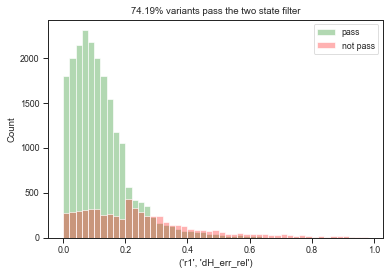

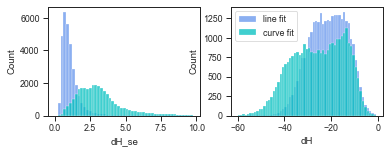

In [126]:
annotation_file = './data/annotation/NNNlib2b_annotation_20220519.tsv'
annotation = fileio.read_annotation(annotation_file, sodium=0.083)
replicate_df = pd.read_table('./data/nnnlib2b_replicates.tsv')

arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                    annotation_file=annotation_file)

myfilter = "dH_err_rel < 0.2 & Tm_err_abs < 2 & redchi < 1.5 & n_inlier > 10"
pass_df = arraydata.filter_two_state(min_rep_pass=2, force_recalculate=True, overwrite_dH=False, myfilter=myfilter)

variant_filter = 'Tm < 55 & Tm > 25'
arr = arraydata.data.join(arraydata.annotation).query(variant_filter)
arraydata.accounting_df.loc['Tm_in_range', :] = arr.groupby('Series').apply(len)
arr['scaffold'] =arr.apply(lambda row: f'{row.bottomScaffold}_{row.topScaffold}', axis=1)

<AxesSubplot:xlabel='Number of variant', ylabel='Series'>

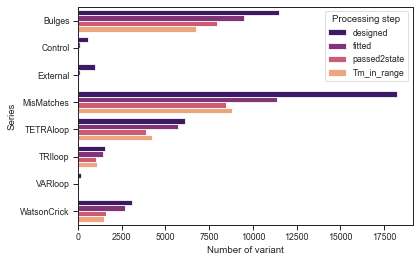

In [127]:
df = arraydata.accounting_df.stack().to_frame('Number of variant').reset_index()
df.rename(columns={'level_0':'Processing step', 'level_1':'Series'}, inplace=True)
sns.barplot(data=df, y='Series', x='Number of variant', hue='Processing step', palette='magma')

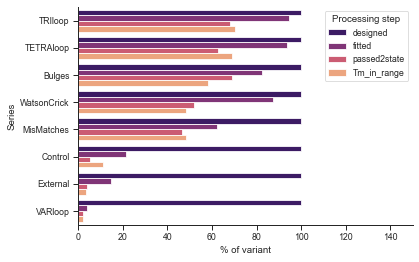

In [129]:
accounting_norm_df = arraydata.accounting_df / arraydata.accounting_df.loc['designed', :] * 100
accounting_norm_df.sort_values(axis=1, by='Tm_in_range', inplace=True, ascending=False)
df = accounting_norm_df.stack().to_frame('% of variant').reset_index()
df.rename(columns={'level_0':'Processing step', 'level_1':'Series'}, inplace=True)
sns.barplot(data=df, y='Series', x='% of variant', hue='Processing step', palette='magma')
plt.xlim([0,150])
sns.despine()

In [54]:
arraydata = ArrayData(replicate_df=replicate_df.iloc[:4,:],
                    annotation_file=annotation_file)
arraydata.data.shape

86.43% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
78.88% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
64.31% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5
71.46% variants passed the filter n_clusters > 5 & dG_37_se < 2 & Tm_se < 25 & dH_se < 25 & RMSE < 0.5


(31000, 24)

In [10]:
row_dict = dict(conc=14, curve_name='Array', dH=)
uv_melt_df.append(row_dict, ignore_index=True)

,conc,curve_name,dH,Tm,fmax,fmin,slopel,slopeu,dH_se,Tm_se,fmax_se,fmin_se,slopel_se,slopeu_se
0,1,MeltingCurve,-49.890048,70.757318,0.181260,0.192135,0.000143,0.000707,1.690004,0.379627,0.004521,0.000136,0.000004,0.000049
1,1,CoolingCurve,-43.969188,69.091675,0.259929,0.212808,0.000035,-0.000098,0.281733,0.065817,0.000999,0.000088,0.000002,0.000011
2,1,SecondaryMeltingCurve,-41.734187,70.106066,0.211659,0.211109,0.000088,0.000655,0.937399,0.183293,0.003173,0.000858,0.000019,0.000033
3,1,SecondaryCoolingCurve,-44.118972,69.343763,0.284101,0.230428,0.000048,-0.000151,0.239550,0.056006,0.000908,0.000078,0.000002,0.000010
4,2,MeltingCurve,-51.846660,66.879867,0.305068,0.391595,0.000165,0.002084,1.452764,0.261462,0.004258,0.000187,0.000006,0.000047
5,2,CoolingCurve,-46.463050,69.417389,0.577435,0.456055,0.000045,-0.000641,0.206366,0.205472,0.011867,0.000168,0.000004,0.000148
6,2,SecondaryMeltingCurve,-43.538930,70.784867,0.487424,0.453024,0.000138,0.000881,0.286898,0.259573,0.013875,0.000452,0.000011,0.000164
7,2,SecondaryCoolingCurve,-43.107685,67.492994,0.459748,0.477283,0.000066,0.000990,2.324236,1.466653,0.047021,0.000261,0.000008,0.000602
8,4,MeltingCurve,-39.618503,72.481289,0.882567,0.887232,0.000260,0.001969,1.802496,0.913964,0.036036,0.000690,0.000023,0.000376
9,4,CoolingCurve,-48.670494,68.777901,1.142593,0.958452,0.000164,-0.000612,0.586828,0.170657,0.011651,0.000353,0.000010,0.000136


In [25]:
arr.columns

Index(['dH', 'dH_se', 'dH_lb', 'dH_ub', 'Tm', 'Tm_se', 'Tm_lb', 'Tm_ub',
       'dG_37', 'dG_37_se', 'dG_37_lb', 'dG_37_ub', 'dS', 'dS_se', 'dS_lb',
       'dS_ub', 'fmax', 'fmax_se', 'fmax_lb', 'fmax_ub', 'fmin', 'fmin_se',
       'fmin_lb', 'fmin_ub', 'two_state', 'dH_line', 'dH_se_line', 'Series',
       'ConstructType', 'bottomScaffold', 'topScaffold', 'RefSeq', 'dH_NUPACK',
       'dS_NUPACK', 'Tm_NUPACK', 'dG_37_ensemble_NUPACK', 'TargetStruct',
       'dG_37_NUPACK', 'dG_37_ensemble_150mM_NUPACK',
       'dG_37_ensemble_75mM_NUPACK', 'GC', 'Tm_NUPACK_salt_corrected',
       'dG_37_NUPACK_salt_corrected', 'dH_NUPACK_salt_corrected',
       'dS_NUPACK_salt_corrected', 'scaffold'],
      dtype='object')

In [23]:
arr.loc['WC68', 'dH_NUPACK']

-52.8

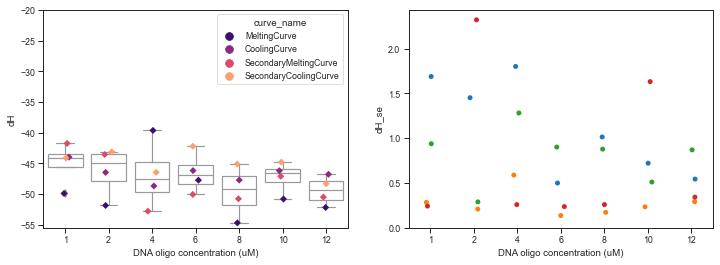

In [3]:
fig, ax = plt.subplots(1,2,figsize=(12,4), sharex=True)
sns.stripplot(data=uv_melt_df, y='dH', x='conc', hue='curve_name', marker='D', palette='magma', ax=ax[0])

sns.boxplot(data=uv_melt_df, y='dH', x='conc', color='white', ax=ax[0])
ax[0].set_ylim(top=-20)
sns.stripplot(data=uv_melt_df, y='dH_se', x='conc', hue='curve_name', ax=ax[1])
ax[1].set_ylim(bottom=0)
ax[1].legend().remove()
for i in range(2):
    ax[i].set_xlabel('DNA oligo concentration (uM)')
# util.save_fig('./fig/UV_melt/WC68_fitted_dH_conc.pdf')

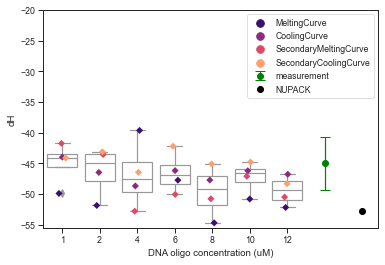

In [37]:
fig, ax = plt.subplots(figsize=(6,4))
sns.stripplot(data=uv_melt_df, y='dH', x='conc', hue='curve_name', marker='D', palette='magma', ax=ax)
sns.boxplot(data=uv_melt_df, y='dH', x='conc', color='white', ax=ax)
ax.errorbar(7, arr.loc['WC68', 'dH'], yerr=arr.loc['WC68', 'dH_se'], fmt='.', c='g', capsize=5, markersize=12, label='measurement')
ax.errorbar(8, arr.loc['WC68', 'dH_NUPACK'], fmt='.', c='k', capsize=5, markersize=12, label='NUPACK')
ax.set_ylim(top=-20)
plt.legend()

ax.set_xlabel('DNA oligo concentration (uM)')
util.save_fig('./fig/UV_melt/WC68_fitted_dH_conc.pdf')

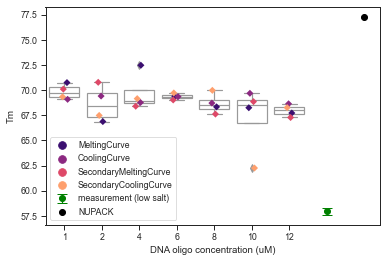

In [46]:
fig, ax = plt.subplots(figsize=(6,4))
sns.stripplot(data=uv_melt_df, y='Tm', x='conc', hue='curve_name', marker='D', palette='magma', ax=ax)
sns.boxplot(data=uv_melt_df, y='Tm', x='conc', color='white', ax=ax)
adjusted_Tm = util.get_Na_adjusted_Tm(arr.loc['WC68', 'Tm'], arr.loc['WC68', 'dH'], row.GC, Na=1.0, from_Na=0.075)
ax.errorbar(7, adjusted_Tm, yerr=arr.loc['WC68', 'Tm_se'], fmt='.', c='g', capsize=5, markersize=12, label='measurement (low salt)')
ax.errorbar(8, arr.loc['WC68', 'Tm_NUPACK'], fmt='.', c='k', capsize=5, markersize=12, label='NUPACK')
# ax.set_ylim(top=-20)
plt.legend()

ax.set_xlabel('DNA oligo concentration (uM)')
util.save_fig('./fig/UV_melt/WC68_fitted_Tm_conc.pdf')

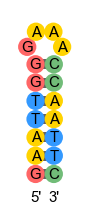

In [33]:
row = arr.loc['WC68', :]
draw_struct(row.RefSeq, row.TargetStruct)

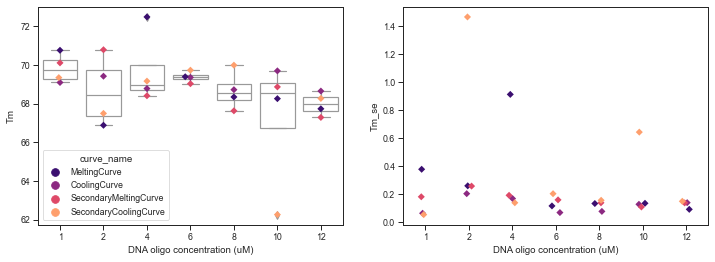

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,4), sharex=True)
sns.swarmplot(data=uv_melt_df, y='Tm', x='conc', hue='curve_name', marker='D', palette='magma', ax=ax[0])
sns.boxplot(data=uv_melt_df, y='Tm', x='conc', color='white', ax=ax[0])
sns.stripplot(data=uv_melt_df, y='Tm_se', x='conc', hue='curve_name', marker='D', palette='magma', ax=ax[1])
ax[1].legend().remove()
for i in range(2):
    ax[i].set_xlabel('DNA oligo concentration (uM)')
util.save_fig('./fig/UV_melt/WC68_fitted_Tm_conc.pdf')

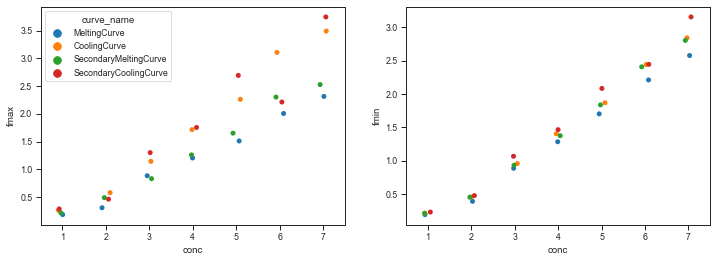

In [65]:
fig, ax = plt.subplots(1,2,figsize=(12,4), sharex=True)
sns.stripplot(data=uv_melt_df, y='fmax', x='conc', hue='curve_name', ax=ax[0])
sns.stripplot(data=uv_melt_df, y='fmin', x='conc', hue='curve_name', ax=ax[1])
ax[1].legend().remove()

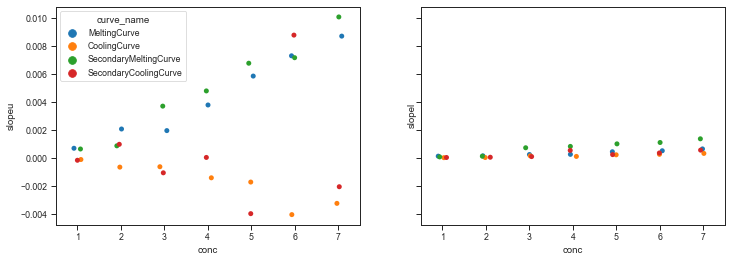

In [67]:
fig, ax = plt.subplots(1,2,figsize=(12,4), sharex=True, sharey=True)
sns.stripplot(data=uv_melt_df, y='slopeu', x='conc', hue='curve_name', ax=ax[0])
sns.stripplot(data=uv_melt_df, y='slopel', x='conc', hue='curve_name', ax=ax[1])
ax[1].legend().remove()

In [81]:
print('1M NaCl:\n\tdH = %.2fkcal/mol\tTm = %.2f°C' % (np.median(uv_melt_df.dH, axis=0), np.median(uv_melt_df.Tm, axis=0)))

1M NaCl:
	dH = -46.93kcal/mol	Tm = 68.95°C


## Conclusion

- $T_M$ is independent of the concentration => it is indeed forming a hairpin.
- Use the 4th concentration ~6uM for everyone.
- Resuspend at 128uM with 1M salt buffer. Dilute 1:20 for experiments. Add 21x 1M HEPES buffer for 50mM Na group.
- May need to fix the slope for future fitting.

# Edge encoding

Testing the edge encoding function.
5 to 3, 3 to 5, hydrogen bonds are orthogonally encoded.

In [6]:
def dotbracket2edgelist(dotbracket_str:str, 
                        edge_feature:bool=True):
    
    assert isinstance(dotbracket_str, str), f'{dotbracket_str} is not a string'
    assert dotbracket_str.count('(') == dotbracket_str.count(')'), \
        'Number of "(" and ")" should match in %s' % dotbracket_str

    # Backbone edges
    N = len(dotbracket_str)
    edge_5p_list = [[i, i+1] for i in range(N-1)]

    # Hydrogen bonds
    edge_hbond_list = []
    flag3p = N - 1
    for i,x in enumerate(dotbracket_str):
        if x == '(':
            for j in range(flag3p, i, -1):
                if dotbracket_str[j] == ')':
                    edge_hbond_list.append([i, j])
                    flag3p = j - 1
                    break

    # 5to3, 3to5, bidirectional hbond
    edge_list = edge_5p_list + [e[::-1] for e in edge_5p_list] + edge_hbond_list + [e[::-1] for e in edge_hbond_list]
    
    if edge_feature:
        n_backbone, n_hbond = len(edge_5p_list), len(edge_hbond_list)
        edge_attr = np.zeros((len(edge_list), 3), dtype=int)
        edge_attr[:n_backbone, 0] = 1
        edge_attr[n_backbone:n_backbone*2, 1] = 1
        edge_attr[-2 * n_hbond:, 2] = 1
        return edge_list, edge_attr
    else:
        return edge_list
    
dotbracket2edgelist('((..))')

([[0, 1],
  [1, 2],
  [2, 3],
  [3, 4],
  [4, 5],
  [1, 0],
  [2, 1],
  [3, 2],
  [4, 3],
  [5, 4],
  [0, 5],
  [1, 4],
  [5, 0],
  [4, 1]],
 array([[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]]))